# 2. Three Dimentional Ordinary Differential Equations

Restricted Three-Body Problem (R3BP)
The three-body problem describes the motion of three point masses (such as stars, planets or the sun) by taking into account their initial positions and velocities. For most initial conditions, the dynamical system becomes chaotic and is difficult to predict over long periods.


The restricted three-body problem is a special case of this problem where two bodies (called primaries) are much more massive than the 3rd body. Thus we can assume that the 3rd body is negligible and does not affect the motion of the primaries. The problem is then to solve for the motion of the 3rd body, under the gravitational influence of the primaries and can be described as a two-body problem. This assumption is very useful to describe the motion of a spacecraft in the Earth-Moon System. In such a case, the primary bodies are Earth and the Moon, and the 3rd body is spacecraft.
## 2.1 The Motion of a Spacecraft in the Earth-Moon System
We can model the motion of a spacecraft that has been launched from Earth and passed by the Moon by using the equations of motion for the circular restricted three-body problem (CR3BP) which assumes the orbit of the primaries to be circular.  In the CR3BP, the equations of motion for the 3rd body are expressed in a rotating frame where the primaries are fixed on the x-axis at positions $(-\mu, 0, 0)$ and $(1-\mu, 0, 0)$. Here $µ$ is the mass parameter defines as $\mu=\frac{m_{Moon}}{m_{Earth} + m_{Moon}}$. The third body has position $(x(t), y(t), z(t))$, at time t. Its equations of motion are

\begin{align}
\ddot x - 2\dot y &= \frac{\partial \Omega}{\partial x}  \\
\ddot y + 2\dot x &= \frac{\partial \Omega}{\partial y}  \\
\ddot z &= \frac{\partial \Omega}{\partial z} 
\end{align}

where

\begin{equation}
\Omega(x, y, z)= \frac{1}{2}(x^2 + y^2) + \frac{1-\mu}{r_1} + \frac{\mu}{r_2} 
\end{equation}

with $r_1 ^2 = (x + \mu)^2 + y^2 + z^2$ and $r_2 ^2= (x - 1 + \mu)^2 + y^2 + z^2$ are the distances from the 3rd body to the primaries. The the equations become

\begin{align}
\ddot x - 2\dot y &= x - \frac{(1-\mu)}{r_1 ^3}(x + \mu) - \frac{\mu}{r_2 ^3}(x - 1 + \mu)  \\
\ddot y + 2\dot x &= y- \frac{(1-\mu)}{r_1 ^3}y - \frac{\mu}{r_2 ^3}y \\
\ddot z &= -\frac{(1-\mu)}{r_1 ^3}z - \frac{\mu}{r_2 ^3}z
\end{align}

### Example 2. (CR3BP)
For the physical parameters $m_{Earth} = 5, 9742 \times 10^{24}$ kg and $m_{Moon} = 7,3477 \times 10^{22}$ kg and initial conditions $x = 0.8$, $y=0$, $z=0$, $\dot x = 0$, $\dot y = 0$ and $\dot z = 0$, solve the equations numerically. 

Comprehensive instructions can be found in Szebehely, V. (2012). Theory of orbit: The restricted problem of three Bodies. Elsevier.

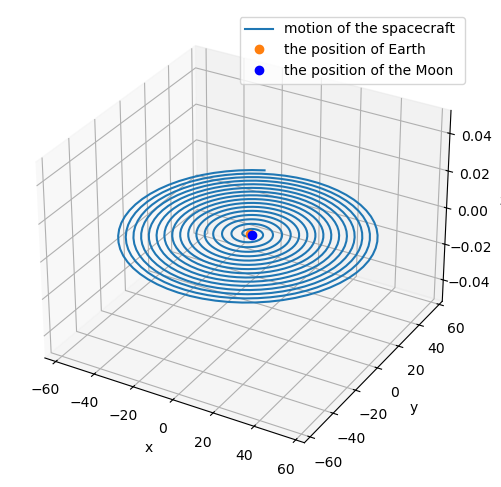

In [2]:
import numpy as np 
from scipy.integrate import odeint 
import matplotlib.pyplot as plt 

m_earth = 59742 * (10**24)
m_moon = 73477 * (10**22)

mu = m_moon / (m_earth + m_moon)

def spacecraft(parameters, t):
    x, y, z, v_x, v_y, v_z = parameters
    
    r1 = np.sqrt((x+mu)**2 + y**2 + z**2)
    r2 = np.sqrt((x-1+mu)**2 + y**2 + z**2)

    a_x = 2 * v_y + x - (1-mu)*(x+mu)/(r1)**3 - (mu)*(x-1+mu)/(r2)**3
    a_y = -2 * v_x + y - (1-mu)*(y)/(r1)**3 - (mu)*(y)/(r2)**3 
    a_z = -(1-mu)*(z)/(r1)**3 - (mu)*(z)/(r2)**3
    
    return v_x, v_y, v_z, a_x, a_y, a_z

# initial conditions 
# -0.45, 0.80, 0.00, -0.80, -0.45, 0.58
#-0.80, 0.0, 0.0, 0.0, -0.6276410653920693, 0.0
x_0 = 0.53
y_0 = -1.1483503762684417
z_0 = 0
v_x0 = 0
v_y0 = 0.17562022877809713
v_z0 = 0
parameters0 = [x_0, y_0, z_0, v_x0, v_y0, v_z0]

t = np.linspace(0, 100, 1000)

# this gives us the values of x,y,z and v_x,v_y,v_z respectively 
result = odeint(spacecraft, parameters0, t)

x = result[:, 0]
y = result[:, 1]
z = result[:, 2]

#position of earth and the moon
Earth_x=[-mu]
Earth_y=[0]
Earth_z=[0]
Moon_x=[1-mu]
Moon_y=[0]
Moon_z=[0]

ax = plt.figure(figsize=(8,6)).add_subplot(projection='3d')
ax.plot(x, y, z, label='motion of the spacecraft ')
ax.plot(Earth_x, Earth_y, Earth_z, "o", label='the position of Earth')
ax.plot(Moon_x, Moon_y, Moon_z, "bo", label='the position of the Moon')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.legend()
plt.show()


### UM-Bridge  Integration

UM-Bridge Model and the client can be found in the following.

In [ ]:
import nest_asyncio
nest_asyncio.apply()
import numpy as np
import math
from scipy.integrate import odeint 
import matplotlib.pyplot as plt
import scipy.integrate as integrate
import scipy.special as special
from mpl_toolkits.mplot3d import axes3d
from numpy import exp,arange
from pylab import meshgrid,cm,imshow,contour,clabel,colorbar,axis,title,show
import numpy
import umbridge

class PDEModel(umbridge.Model):
    def __init__(self):
        super().__init__("forward")
        self.m_earth = 59742 * (10**24)
        self.m_moon = 73477 * (10**22)
        self.mu = self.m_moon / (self.m_earth + self.m_moon)
        self.t = np.linspace(0, 100, 1000)

              
    def get_input_sizes(self, config):
        return [6]  # for the inputs x_0, y_0, z_0, v_x0, v_y0, v_z0
        
    def get_output_sizes(self, config):
        return [1000] # for the output x, y, z and v_x, v_y, v_z
        
    def __call__(self, parameters, config):
        x = parameters[0][0]
        y = parameters[0][1]
        z = parameters[0][2]
        v_x = parameters[0][3]
        v_y = parameters[0][4]
        v_z = parameters[0][5]
        result = odeint(self.spacecraft, [item for sublist in parameters for item in sublist], self.t)
        a=[row[0] for row in result.tolist()]
        return [a]

    def spacecraft( self, parameters, config):
        x, y, z, v_x, v_y, v_z = parameters
        
        r1 = np.sqrt((x+self.mu)**2 + y**2 + z**2)
        r2 = np.sqrt((x-1+self.mu)**2 + y**2 + z**2)

        a_x = 2 * v_y + x - (1-self.mu)*(x+self.mu)/(r1)**3 - (self.mu)*(x-1+self.mu)/(r2)**3
        a_y = -2 * v_x + y - (1-self.mu)*(y)/(r1)**3 - (self.mu)*(y)/(r2)**3 
        a_z = -(1-self.mu)*(z)/(r1)**3 - (self.mu)*(z)/(r2)**3
    
        return [v_x, v_y, v_z, a_x, a_y, a_z]
        
        
    def supports_evaluate(self):
        return True

pde_model = PDEModel()
umbridge.serve_models([pde_model], 4243)

In [ ]:
import umbridge
import numpy as np

model = umbridge.HTTPModel("http://0.0.0.0:4243", "forward")
range = np.linspace(0, 10, 1000)

for t in range:
   print(model([[-0.8, 0., 0., 0., -0.6276410653920693, 0., t]]))

## 2.2 Forward Uncertainty Quantification (UQ) Analysis 
### 2.2.1 Objective and Case study
In this section, forward UQ analysis is performed by using Monte Carlo simulation. So that, we can better understand and explain how the motion of a spacecraft varies in the presence of the uncertain parameter. We are considering a CR3BP to predict the motion of a spacecraft in the Earth-Moon system. In this problem, we don't have the exact value of each planet's mass. Thus, $\mu=\frac{m_{Moon}}{m_{Earth} + m_{Moon}}$ is considered as the uncertain parameter. 
For this analysis, we first generate random samples for the uncertain parameter $\mu$ and then apply Monte Carlo. 

### 2.2.2 Random sample generation and Monte Carlo simulation
If Earth is about 4 times wider than the Moon, we can assume that Earth weighs at least $4^3$ times more than the Moon. Then, the sample can be generated from uniform distribution $U(0, 0.015)$. Thus, we can apply Monte Carlo simulation.

In [1]:
import numpy as np

# Set the number of random variables
N = 1000

# Generate N uniform distributed random variables between 0 and 1
X = np.random.uniform(0, 0.015, N)

# Calculate the mean of the random variables
mean_mu = np.mean(X) # MC estimator for mu
print("MC estimator for mass parameter µ:", mean_mu, "\n")

MC estimator for mass parameter µ: 0.0075008401308823865 



Now we are able to show the estimated motion of a spacecraft. 

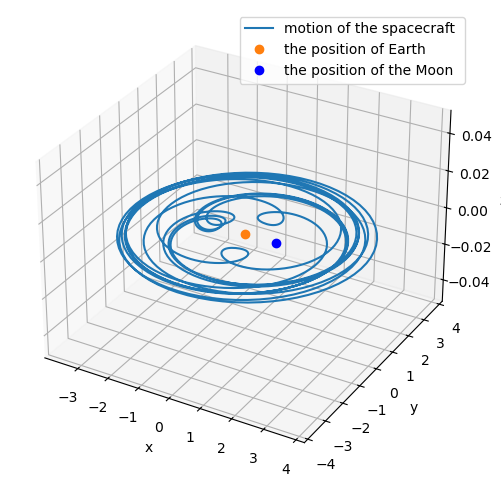

In [4]:
import numpy as np 
from scipy.integrate import odeint 
import matplotlib.pyplot as plt 



mu = mean_mu 

def spacecraft(parameters, t):
    x, y, z, v_x, v_y, v_z = parameters
    
    r1 = np.sqrt((x+mu)**2 + y**2 + z**2)
    r2 = np.sqrt((x-1+mu)**2 + y**2 + z**2)

    a_x = 2 * v_y + x - (1-mu)*(x+mu)/(r1)**3 - (mu)*(x-1+mu)/(r2)**3
    a_y = -2 * v_x + y - (1-mu)*(y)/(r1)**3 - (mu)*(y)/(r2)**3 
    a_z = -(1-mu)*(z)/(r1)**3 - (mu)*(z)/(r2)**3
    
    return v_x, v_y, v_z, a_x, a_y, a_z

# initial conditions 
# -0.45, 0.80, 0.00, -0.80, -0.45, 0.58
#-0.80, 0.0, 0.0, 0.0, -0.6276410653920693, 0.0
x_0 = -0.8
y_0 = 0
z_0 = 0
v_x0 = 0
v_y0 = -0.6276410653920693
v_z0 = 0
parameters0 = [x_0, y_0, z_0, v_x0, v_y0, v_z0]

t = np.linspace(0, 100, 1000)

# this gives us the values of x,y,z and v_x,v_y,v_z respectively 
result = odeint(spacecraft, parameters0, t)

MCx = result[:, 0]
MCy = result[:, 1]
MCz = result[:, 2]

#position of earth and the moon
Earth_x=[-mu]
Earth_y=[0]
Earth_z=[0]
Moon_x=[1-mu]
Moon_y=[0]
Moon_z=[0]

ax = plt.figure(figsize=(8,6)).add_subplot(projection='3d')
ax.plot(MCx, MCy, MCz, label='motion of the spacecraft ')
ax.plot(Earth_x, Earth_y, Earth_z, "o", label='the position of Earth')
ax.plot(Moon_x, Moon_y, Moon_z, "bo", label='the position of the Moon')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.legend()
plt.show()


### 2.2.3 Data Visualization
In this section, we can plot motion of a space craft in the x direction with and without uncertain parameter $\mu$. In the second figure, data is obtained by generating uncertain parameter $\mu$.

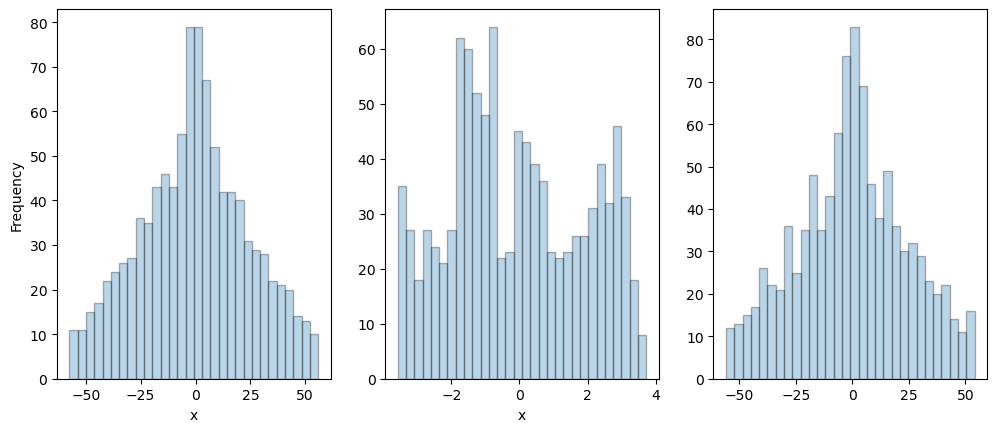

Expected value of x(t): -0.5664994373319278
Expected value of x(t) with uncertain mass parameter: -0.08661552085930953
Expected value of the difference: -0.4798839164726181


In [5]:
import matplotlib.pyplot as plt
import numpy as np



plt.figure(figsize=plt.figaspect(0.4))

plt.subplot(1, 3, 1)
list_1 = x.tolist()
plt.hist(list_1, bins=30, edgecolor='k', alpha=0.3)
plt.xlabel("x")
plt.ylabel("Frequency")
#plt.title('µ is known')

plt.subplot(1, 3, 2)
list_2 = MCx.tolist()
plt.hist(list_2, bins=30, edgecolor='k', alpha=0.3)
plt.xlabel("x")
#plt.title('µ is uncertain parameter ')

plt.subplot(1,3,3)
Output = [xi - yi for xi, yi in zip(x, MCx)]
plt.hist(Output, bins=30, edgecolor='k', alpha=0.3)
#plt.title('µ is uncertain parameter ')

plt.show()


mean_1 = np.mean(list_1)
mean_2 = np.mean(list_2)
mean_3 = np.mean(Output)
print(f"Expected value of x(t): {mean_1}")
print(f"Expected value of x(t) with uncertain mass parameter: {mean_2}")
print(f"Expected value of the difference: {mean_3}")